# 유튜브 랭킹 시각화

In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [3]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브_랭킹.csv to 유튜브_랭킹.csv


In [4]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,영상갯수
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,735,840,000",654
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,895,380,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [53]:
# 구독자수 --> 구독자수2(정수)
df['구독자수2'] = df['구독자수'].apply(lambda x: int(x.replace(',', '')))
df['영상갯수2'] = df['영상갯수'].apply(lambda x: int(x.replace(',', '')))
df.head()

,카테고리,채널명,구독자수,조회수,영상갯수,구독자수2,영상갯수2
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371,64100000,371
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,735,840,000",654,60400000,654
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,579",56500000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000","21,895,380,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


- 비디오수 Top20 (채널명, 비디오수) 막대 그래프

In [77]:
df1 = df[['채널명', '영상갯수2']].sort_values(by='영상갯수2', ascending=False)
df1.set_index('채널명', inplace=True)
df2 = df1.head(20).sort_values(by='영상갯수2')
df2.head()

,영상갯수2
채널명,
tvN,59409
채널A 뉴스,60862
뉴스TVCHOSUN,63744
JTBC Entertainment,63970
TVCHOSUN - TV조선,64268


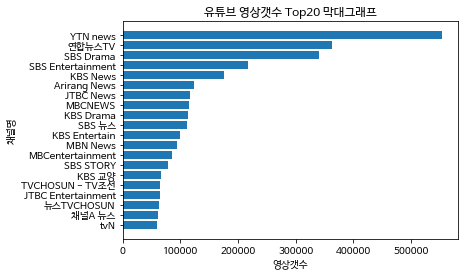

In [78]:
plt.barh(df2.head(20).index, df2.head(20).영상갯수2)
plt.title("유튜브 영상갯수 Top20 막대그래프")
plt.xlabel("영상갯수")
plt.ylabel('채널명')
plt.show()

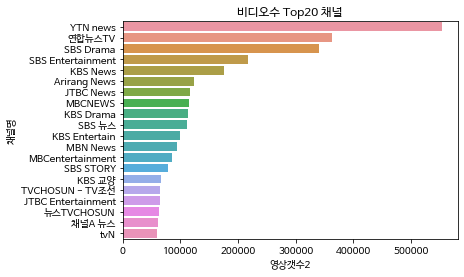

In [82]:
import seaborn as sns
df2 = df[['채널명', '영상갯수2']].sort_values(by='영상갯수2', ascending=False)
sns.barplot(y='채널명', x='영상갯수2', data=df2.head(20))
plt.title('비디오수 Top20 채널')
plt.show()

In [84]:
df['카테고리'].value_counts().to_frame()

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


In [85]:
df[['카테고리', '채널명']].groupby('카테고리').count()

,채널명
카테고리,
BJ/인물/연예인,71
IT/기술/컴퓨터,8
TV/방송,146
게임,74
교육/강의,22
국내/해외/여행,4
뉴스/정치/사회,53
미분류,114
스포츠/운동,8
